<a href="https://colab.research.google.com/github/2303a51871/2303a51871/blob/main/Assignment_2_1871.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy

In [8]:
import pandas as pd
import spacy
df=pd.read_csv('/content/archive.zip')
pln=spacy.load('en_core_web_sm')
print(df)
df.head(26)


/tmp/ipython-input-543440281.py:3: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/archive.zip')


        Date received                                            Product  \
0          05/10/2019                        Checking or savings account   
1          05/10/2019                        Checking or savings account   
2          05/10/2019                                    Debt collection   
3          05/10/2019  Credit reporting, credit repair services, or o...   
4          05/10/2019                        Checking or savings account   
...               ...                                                ...   
1282350    12/01/2011                                        Credit card   
1282351    12/01/2011                                           Mortgage   
1282352    12/01/2011                                        Credit card   
1282353    12/01/2011                                           Mortgage   
1282354    12/01/2011                                        Credit card   

                                    Sub-product  \
0                              Check

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460
5,05/10/2019,Mortgage,Other type of mortgage,Closing on a mortgage,NaN,NaN,NaN,Statebridge Company,NJ,08302,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237885
6,05/10/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"Diversified Consultants, Inc.",TX,NaN,Servicemember,NaN,Web,05/10/2019,In progress,Yes,NaN,3238585
7,05/10/2019,Student loan,Federal student loan servicing,Struggling to repay your loan,Problem lowering your monthly payments,NaN,NaN,Student Loan Direct,TX,773XX,Older American,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238221
8,05/10/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"Diversified Consultants, Inc.",SC,296XX,Servicemember,NaN,Web,05/10/2019,In progress,Yes,NaN,3238545
9,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,CONTRACT CALLERS INC,MD,20774,NaN,NaN,Web,05/10/2019,In progress,Yes,NaN,3238458


In [ ]:
d=df['Consumer complaint narrative']
print(d)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1282350    NaN
1282351    NaN
1282352    NaN
1282353    NaN
1282354    NaN
Name: Consumer complaint narrative, Length: 1282355, dtype: object


In [10]:
print(df['Consumer complaint narrative'].head(25))

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
Name: Consumer complaint narrative, dtype: object


In [12]:
df['num_chars'] = df['Consumer complaint narrative'].astype(str).apply(len)
df['num_words'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))

print(df[['Consumer complaint narrative', 'num_chars', 'num_words']].head(25))

   Consumer complaint narrative  num_chars  num_words
0                           NaN          3          1
1                           NaN          3          1
2                           NaN          3          1
3                           NaN          3          1
4                           NaN          3          1
5                           NaN          3          1
6                           NaN          3          1
7                           NaN          3          1
8                           NaN          3          1
9                           NaN          3          1
10                          NaN          3          1
11                          NaN          3          1
12                          NaN          3          1
13                          NaN          3          1
14                          NaN          3          1
15                          NaN          3          1
16                          NaN          3          1
17                          

In [20]:
complaints = df['Consumer complaint narrative'].dropna()
complaints = complaints[complaints.str.strip() != ""]

complaints = complaints.head(25)

print("Number of complaints taken:", len(complaints))
print(complaints.head(5))

Number of complaints taken: 25
29904    The Summer of XX/XX/2018 I was denied a mortga...
30629    There are many mistakes appear in my report wi...
30735    There are many mistakes appear in my report wi...
30795    There are many mistakes appear in my report wi...
30807    There are many mistakes appear in my report wi...
Name: Consumer complaint narrative, dtype: object


In [30]:
import nltk
from nltk import word_tokenize, pos_tag

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [31]:
all_tags = []

for text in complaints:
    tokens = word_tokenize(str(text))
    tagged = pos_tag(tokens)
    all_tags.extend([tag for _, tag in tagged])


pos_counts = Counter(all_tags)
print("\nPOS Tag Frequency:")
print(pos_counts.most_common(15))



POS Tag Frequency:
[('NN', 397), ('IN', 267), ('NNP', 250), ('DT', 234), ('PRP', 169), ('VB', 115), ('JJ', 113), ('.', 113), ('VBD', 107), ('RB', 102), ('CC', 99), ('TO', 94), ('NNS', 92), ('PRP$', 84), (',', 83)]


Top Verbs: [('visit', 1), ('sooooo', 1), ('contact', 1), ('call', 1), ('code', 1)]
Top Adjectives: [('more', 1), ('exciting', 1), ('useful', 1)]


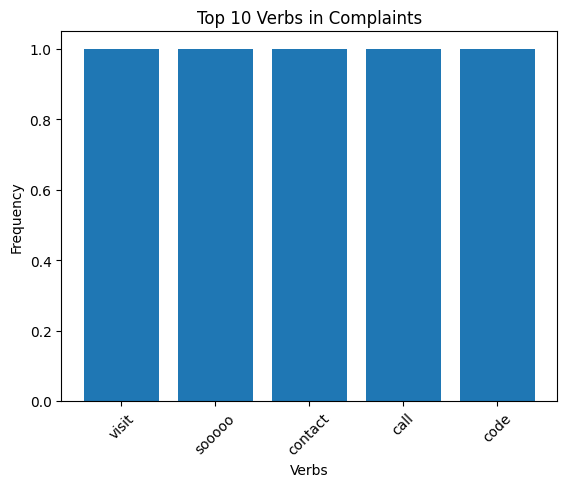

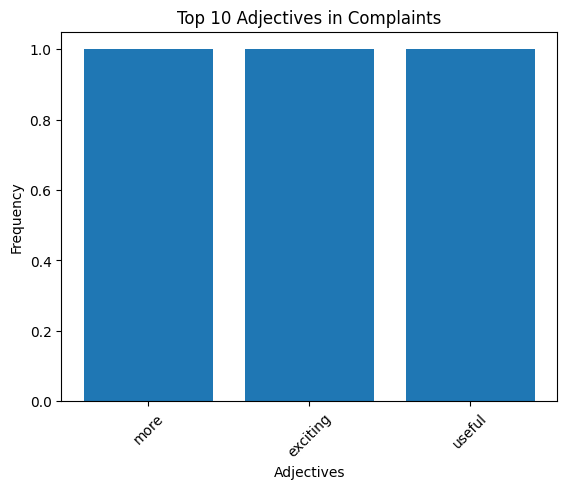

In [27]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt


nlp = spacy.load("en_core_web_sm")


texts = [
    "My phone number is 1234567890 and my email is test@domain.com",
    "Visit https: for more info!!!",
    "HELLO!!! This is SOOOOO exciting :))",
    "Contact us at info@company.org or call +91 98765-43210",
    "Python's regex is very useful!!!  #Coding #Fun"
]


docs = list(nlp.pipe(texts))

verbs = Counter()
adjectives = Counter()

for doc in docs:
    for token in doc:
        if token.pos_ == "VERB":
            verbs[token.lemma_.lower()] += 1
        elif token.pos_ == "ADJ":
            adjectives[token.lemma_.lower()] += 1


top_verbs = verbs.most_common(10)
top_adjs = adjectives.most_common(10)

print("Top Verbs:", top_verbs)
print("Top Adjectives:", top_adjs)


plt.bar([v[0] for v in top_verbs], [v[1] for v in top_verbs])
plt.title("Top 10 Verbs in Complaints")
plt.xlabel("Verbs")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


plt.bar([a[0] for a in top_adjs], [a[1] for a in top_adjs])
plt.title("Top 10 Adjectives in Complaints")
plt.xlabel("Adjectives")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()
